In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('ai4i2020.csv')

# Display top of dataframe
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
# Statistics for each column
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(data)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


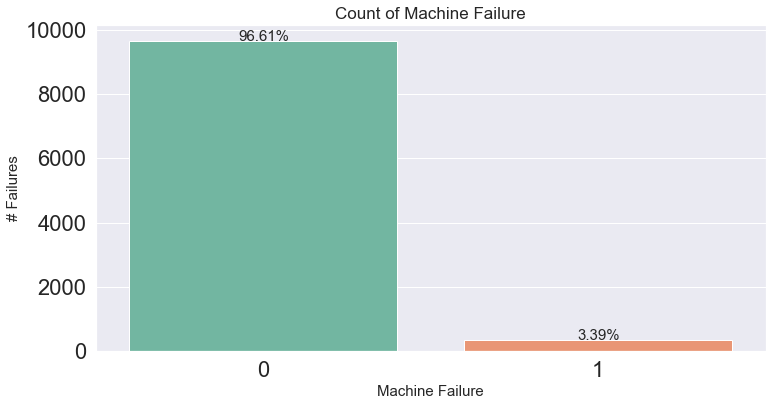

In [7]:
# Plot target variable
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'Machine failure', data = data, palette = "Set2")
g.set_title('Count of Machine Failure', fontsize = 17)
g.set_xlabel('Machine Failure', fontsize = 15)
g.set_ylabel('# Failures', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data) * 100),
            ha="center", fontsize=15)


In [8]:
# Number of unique UDI
len(data['UDI'].unique().tolist())

10000

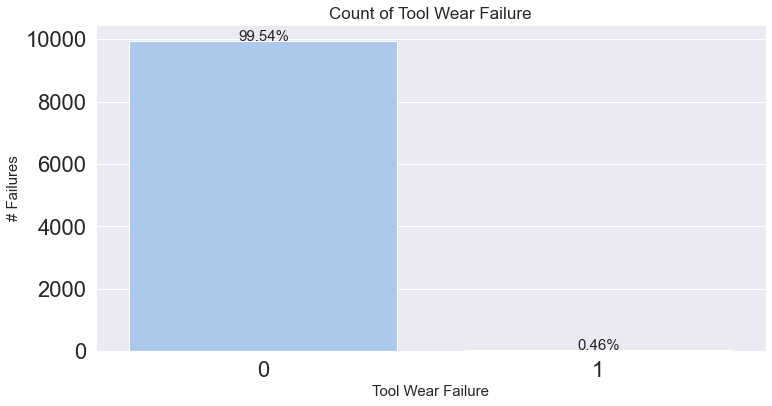

In [9]:
# Plot Tool Wear Failure 
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'TWF', data = data, palette = "pastel")
g.set_title('Count of Tool Wear Failure', fontsize = 17)
g.set_xlabel('Tool Wear Failure', fontsize = 15)
g.set_ylabel('# Failures', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data) * 100),
            ha="center", fontsize=15)


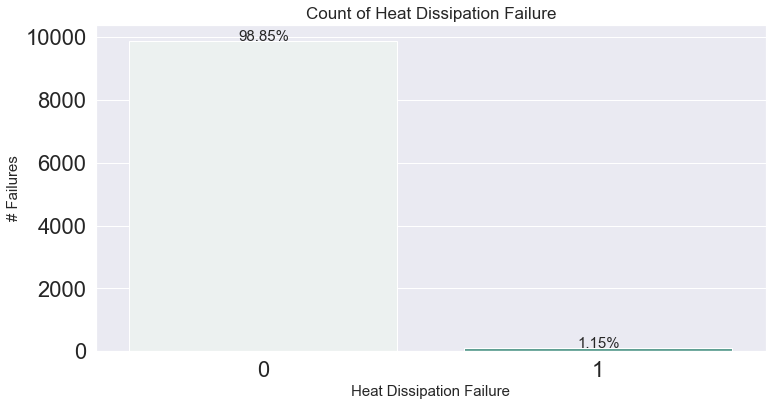

In [10]:
# Plot Heat Dissipation Failure 
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'HDF', data = data, palette = "light:#5A9")
g.set_title('Count of Heat Dissipation Failure', fontsize = 17)
g.set_xlabel('Heat Dissipation Failure', fontsize = 15)
g.set_ylabel('# Failures', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data) * 100),
            ha="center", fontsize=15)

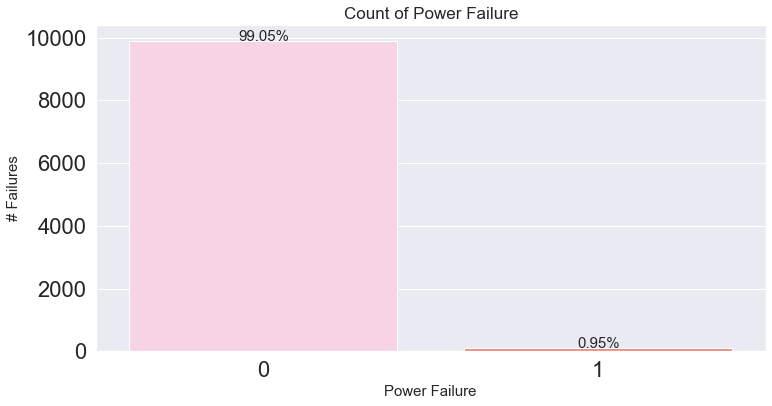

In [11]:
# Plot Power Failure 
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'PWF', data = data, palette = "Set3_r")
g.set_title('Count of Power Failure', fontsize = 17)
g.set_xlabel('Power Failure', fontsize = 15)
g.set_ylabel('# Failures', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data) * 100),
            ha="center", fontsize=15)

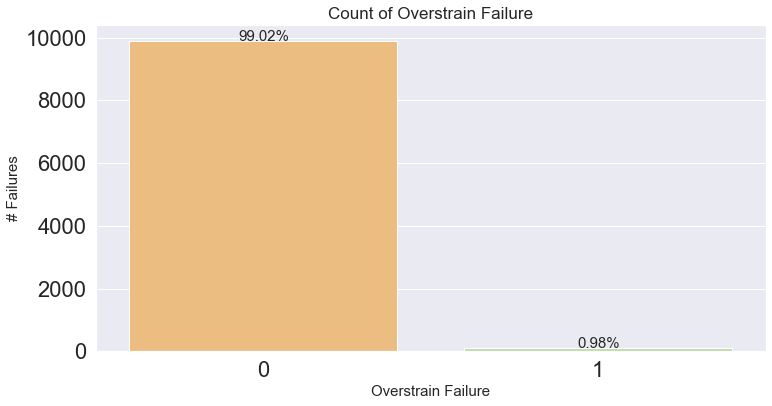

In [12]:
# Plot Overstrain Failure 
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'OSF', data = data, palette = "Spectral")
g.set_title('Count of Overstrain Failure', fontsize = 17)
g.set_xlabel('Overstrain Failure', fontsize = 15)
g.set_ylabel('# Failures', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data) * 100),
            ha="center", fontsize=15)

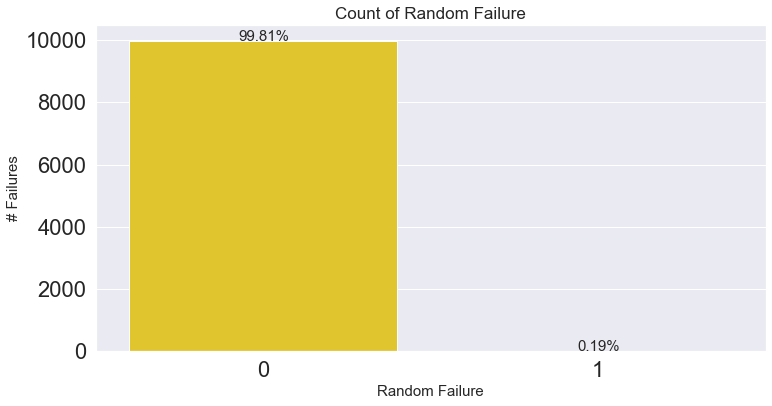

In [13]:
# Plot Random Failure 
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'RNF', data = data, palette = "Wistia")
g.set_title('Count of Random Failure', fontsize = 17)
g.set_xlabel('Random Failure', fontsize = 15)
g.set_ylabel('# Failures', fontsize = 15)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(data) * 100),
            ha="center", fontsize=15)

In [14]:
# Find correlations with the target and sort
corr = data.corr()['Machine failure'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(6))
print('\nMost Negative Correlations:\n', corr.head(5))

Most Positive Correlations:
 Torque [Nm]        0.191321
TWF                0.362904
PWF                0.522812
OSF                0.531083
HDF                0.575800
Machine failure    1.000000
Name: Machine failure, dtype: float64

Most Negative Correlations:
 Rotational speed [rpm]    -0.044188
UDI                       -0.022892
RNF                        0.004516
Process temperature [K]    0.035946
Air temperature [K]        0.082556
Name: Machine failure, dtype: float64


In [15]:
# Correlation 
top_feat = np.absolute(data.corr()['Machine failure']).sort_values(ascending=False)[:11]
top_feat

Machine failure            1.000000
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Rotational speed [rpm]     0.044188
Process temperature [K]    0.035946
UDI                        0.022892
Name: Machine failure, dtype: float64

In [16]:
# Top 10 features
print(top_feat.index)

Index(['Machine failure', 'HDF', 'OSF', 'PWF', 'TWF', 'Torque [Nm]',
       'Tool wear [min]', 'Air temperature [K]', 'Rotational speed [rpm]',
       'Process temperature [K]', 'UDI'],
      dtype='object')


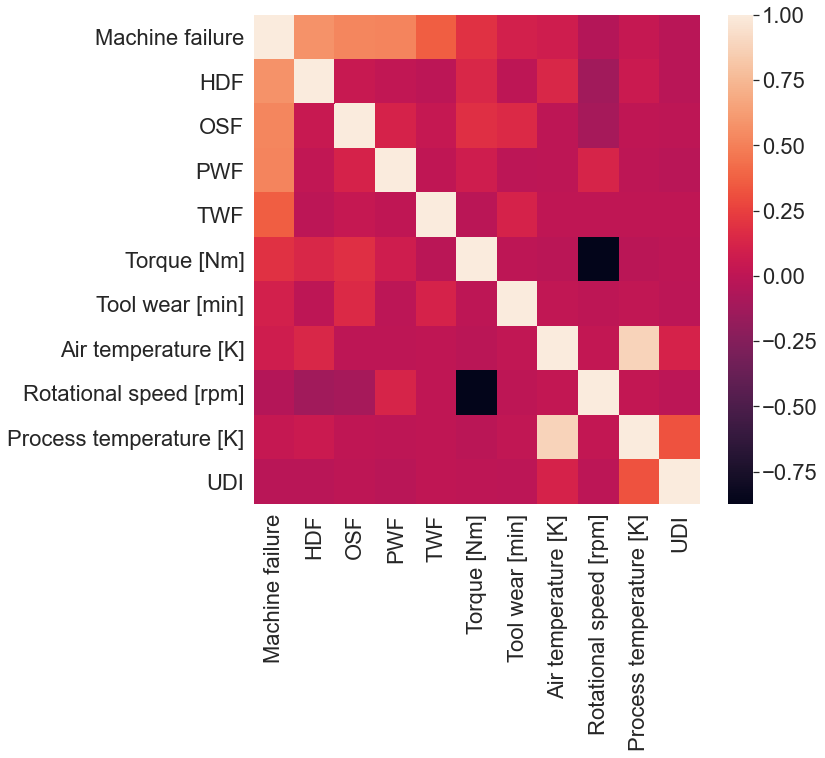

In [17]:
pp = data[top_feat.index]
plt.figure(figsize=(10,9))
corr = pp.corr()
sns.heatmap(corr)
plt.savefig('heatmat.png')